In [100]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.feather as feather
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller, coint
from datetime import datetime, timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
price_df = feather.read_feather('data\\91_coin_price.feather')
volume_df = feather.read_feather('data\\91_coin_volume.feather')
# price_df = feather.read_feather('data/91_coin_price.feather')
# volume_df = feather.read_feather('data/91_coin_volume.feather')

In [5]:
n_cols = [i[4:] for i in price_df.columns]

In [6]:
price_df.columns = n_cols
volume_df.columns = n_cols

In [7]:
volume_df.sum().sort_values(ascending=False).head(10)

BTC    131517203059590.71875
XRP     98854508885164.68750
SOL     53138719448687.10156
DOGE    45987918999275.82812
ETC     37530292699133.97656
ETH     37373210414715.83594
STX     37042913963910.07812
APT     27985444037772.73047
BCH     24496056818023.52734
GAS     24304903508824.66797
dtype: float64

In [8]:
top6_volume_coins = ['BTC', 'XRP', 'SOL', 'DOGE', 'ETC', 'ETH']

In [9]:
top6_df = price_df[top6_volume_coins]

In [10]:
btc_price = price_df['BTC']
xrp_price = price_df['XRP']
sol_price = price_df['SOL']
doge_price = price_df['DOGE']
etc_price = price_df['ETC']
eth_price = price_df['ETH']

# 15분
btc_15m_price = btc_price.resample('15T').agg({'BTC':'last'})
xrp_15m_price = xrp_price.resample('15T').agg({'XRP':'last'})
sol_15m_price = sol_price.resample('15T').agg({'SOL':'last'})
doge_15m_price = doge_price.resample('15T').agg({'DOGE':'last'})
etc_15m_price = etc_price.resample('15T').agg({'ETC':'last'})
eth_15m_price = eth_price.resample('15T').agg({'ETH':'last'})
all_15m_list = [btc_15m_price, xrp_15m_price, sol_15m_price, doge_15m_price, etc_15m_price, eth_15m_price]

# 1시간
btc_1h_price = btc_price.resample('1H').agg({'BTC':'last'})
xrp_1h_price = xrp_price.resample('1H').agg({'XRP':'last'})
sol_1h_price = sol_price.resample('1H').agg({'SOL':'last'})
doge_1h_price = doge_price.resample('1H').agg({'DOGE':'last'})
etc_1h_price = etc_price.resample('1H').agg({'ETC':'last'})
eth_1h_price = eth_price.resample('1H').agg({'ETH':'last'})
all_1h_list = [btc_1h_price, xrp_1h_price, sol_1h_price, doge_1h_price, etc_1h_price, eth_1h_price]

# 4시간
btc_4h_price = btc_price.resample('4H').agg({'BTC':'last'})
xrp_4h_price = xrp_price.resample('4H').agg({'XRP':'last'})
sol_4h_price = sol_price.resample('4H').agg({'SOL':'last'})
doge_4h_price = doge_price.resample('4H').agg({'DOGE':'last'})
etc_4h_price = etc_price.resample('4H').agg({'ETC':'last'})
eth_4h_price = eth_price.resample('4H').agg({'ETH':'last'})
all_4h_list = [btc_4h_price, xrp_4h_price, sol_4h_price, doge_4h_price, etc_4h_price, eth_4h_price]

# 6시간
btc_6h_price = btc_price.resample('6H').agg({'BTC':'last'})
xrp_6h_price = xrp_price.resample('6H').agg({'XRP':'last'})
sol_6h_price = sol_price.resample('6H').agg({'SOL':'last'})
doge_6h_price = doge_price.resample('6H').agg({'DOGE':'last'})
etc_6h_price = etc_price.resample('6H').agg({'ETC':'last'})
eth_6h_price = eth_price.resample('6H').agg({'ETH':'last'})
all_6h_list = [btc_6h_price, xrp_6h_price, sol_6h_price, doge_6h_price, etc_6h_price, eth_6h_price]

# 8시간
btc_8h_price = btc_price.resample('8H').agg({'BTC':'last'})
xrp_8h_price = xrp_price.resample('8H').agg({'XRP':'last'})
sol_8h_price = sol_price.resample('8H').agg({'SOL':'last'})
doge_8h_price = doge_price.resample('8H').agg({'DOGE':'last'})
etc_8h_price = etc_price.resample('8H').agg({'ETC':'last'})
eth_8h_price = eth_price.resample('8H').agg({'ETH':'last'})
all_8h_list = [btc_8h_price, xrp_8h_price, sol_8h_price, doge_8h_price, etc_8h_price, eth_8h_price]

# 12시간
btc_12h_price = btc_price.resample('12H').agg({'BTC':'last'})
xrp_12h_price = xrp_price.resample('12H').agg({'XRP':'last'})
sol_12h_price = sol_price.resample('12H').agg({'SOL':'last'})
doge_12h_price = doge_price.resample('12H').agg({'DOGE':'last'})
etc_12h_price = etc_price.resample('12H').agg({'ETC':'last'})
eth_12h_price = eth_price.resample('12H').agg({'ETH':'last'})
all_12h_list = [btc_12h_price, xrp_12h_price, sol_12h_price, doge_12h_price, etc_12h_price, eth_12h_price]

# 일봉
btc_1d_price = btc_price.resample('1D').agg({'BTC':'last'})
xrp_1d_price = xrp_price.resample('1D').agg({'XRP':'last'})
sol_1d_price = sol_price.resample('1D').agg({'SOL':'last'})
doge_1d_price = doge_price.resample('1D').agg({'DOGE':'last'})
etc_1d_price = etc_price.resample('1D').agg({'ETC':'last'})
eth_1d_price = eth_price.resample('1D').agg({'ETH':'last'})
all_1d_list = [btc_1d_price, xrp_1d_price, sol_1d_price, doge_1d_price, etc_1d_price, eth_1d_price]

# 주봉
btc_1w_price = btc_price.resample('1W').agg({'BTC':'last'})
xrp_1w_price = xrp_price.resample('1W').agg({'XRP':'last'})
sol_1w_price = sol_price.resample('1W').agg({'SOL':'last'})
doge_1w_price = doge_price.resample('1W').agg({'DOGE':'last'})
etc_1w_price = etc_price.resample('1W').agg({'ETC':'last'})
eth_1w_price = eth_price.resample('1W').agg({'ETH':'last'})
all_1w_list = [btc_1w_price, xrp_1w_price, sol_1w_price, doge_1w_price, etc_1w_price, eth_1w_price]

In [ ]:
plt.figure(figsize=(20, 15));

plt.subplot(6,2,1)
sns.histplot(btc_1h_price.pct_change(),kde=True, bins=30);
plt.title('1-hour btc return histogram')
plt.subplot(6,2,2)
plt.plot(btc_1h_price.pct_change());
plt.title('1-hour btc return graph')

plt.subplot(6,2,3)
sns.histplot(btc_4h_price.pct_change(),kde=True, bins=30);
plt.title('4-hour btc return histogram')
plt.subplot(6,2,4)
plt.plot(btc_4h_price.pct_change());
plt.title('4-hour btc return graph')

plt.subplot(6,2,5)
sns.histplot(btc_6h_price.pct_change(),kde=True, bins=30);
plt.title('6-hour btc return histogram')
plt.subplot(6,2,6)
plt.plot(btc_6h_price.pct_change());
plt.title('6-hour btc return graph')

plt.subplot(6,2,7)
sns.histplot(btc_12h_price.pct_change(),kde=True, bins=30);
plt.title('12-hour btc return histogram')
plt.subplot(6,2,8)
plt.plot(btc_12h_price.pct_change());
plt.title('12-hour btc return graph')

plt.subplot(6,2,9)
sns.histplot(btc_1d_price.pct_change(),kde=True, bins=30);
plt.title('1-day btc return histogram')
plt.subplot(6,2,10)
plt.plot(btc_1d_price.pct_change());
plt.title('1-day btc return graph')

plt.subplot(6,2,11)
sns.histplot(btc_1w_price.pct_change(),kde=True, bins=30);
plt.title('1-week btc return histogram')
plt.subplot(6,2,12)
plt.plot(btc_1w_price.pct_change());
plt.title('1-week btc return graph')

plt.tight_layout();

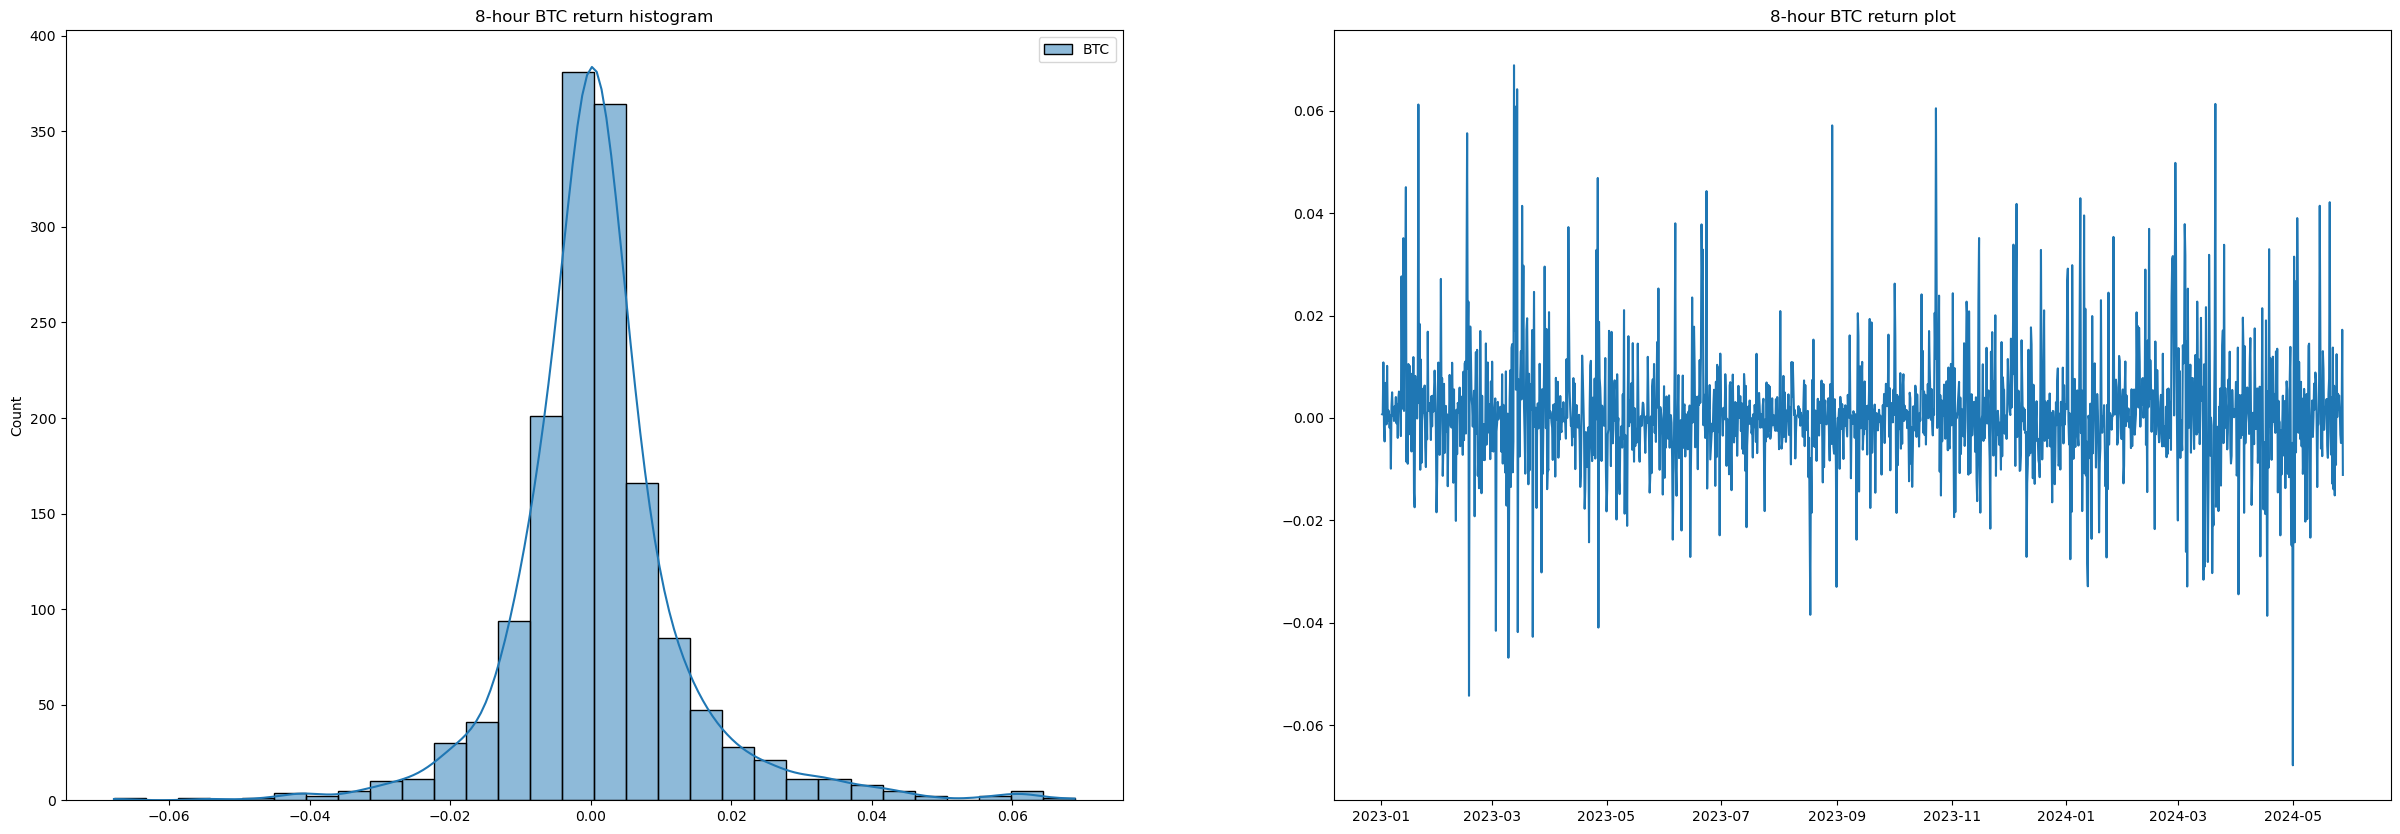

In [21]:
plt.figure(figsize=(30, 10));

plt.subplot(1,2,1);
sns.histplot(btc_8h_price.pct_change(),kde=True, bins=30);
plt.title('8-hour BTC return histogram');
plt.subplot(1,2,2);
plt.plot(btc_8h_price.pct_change());
plt.title('8-hour BTC return plot');

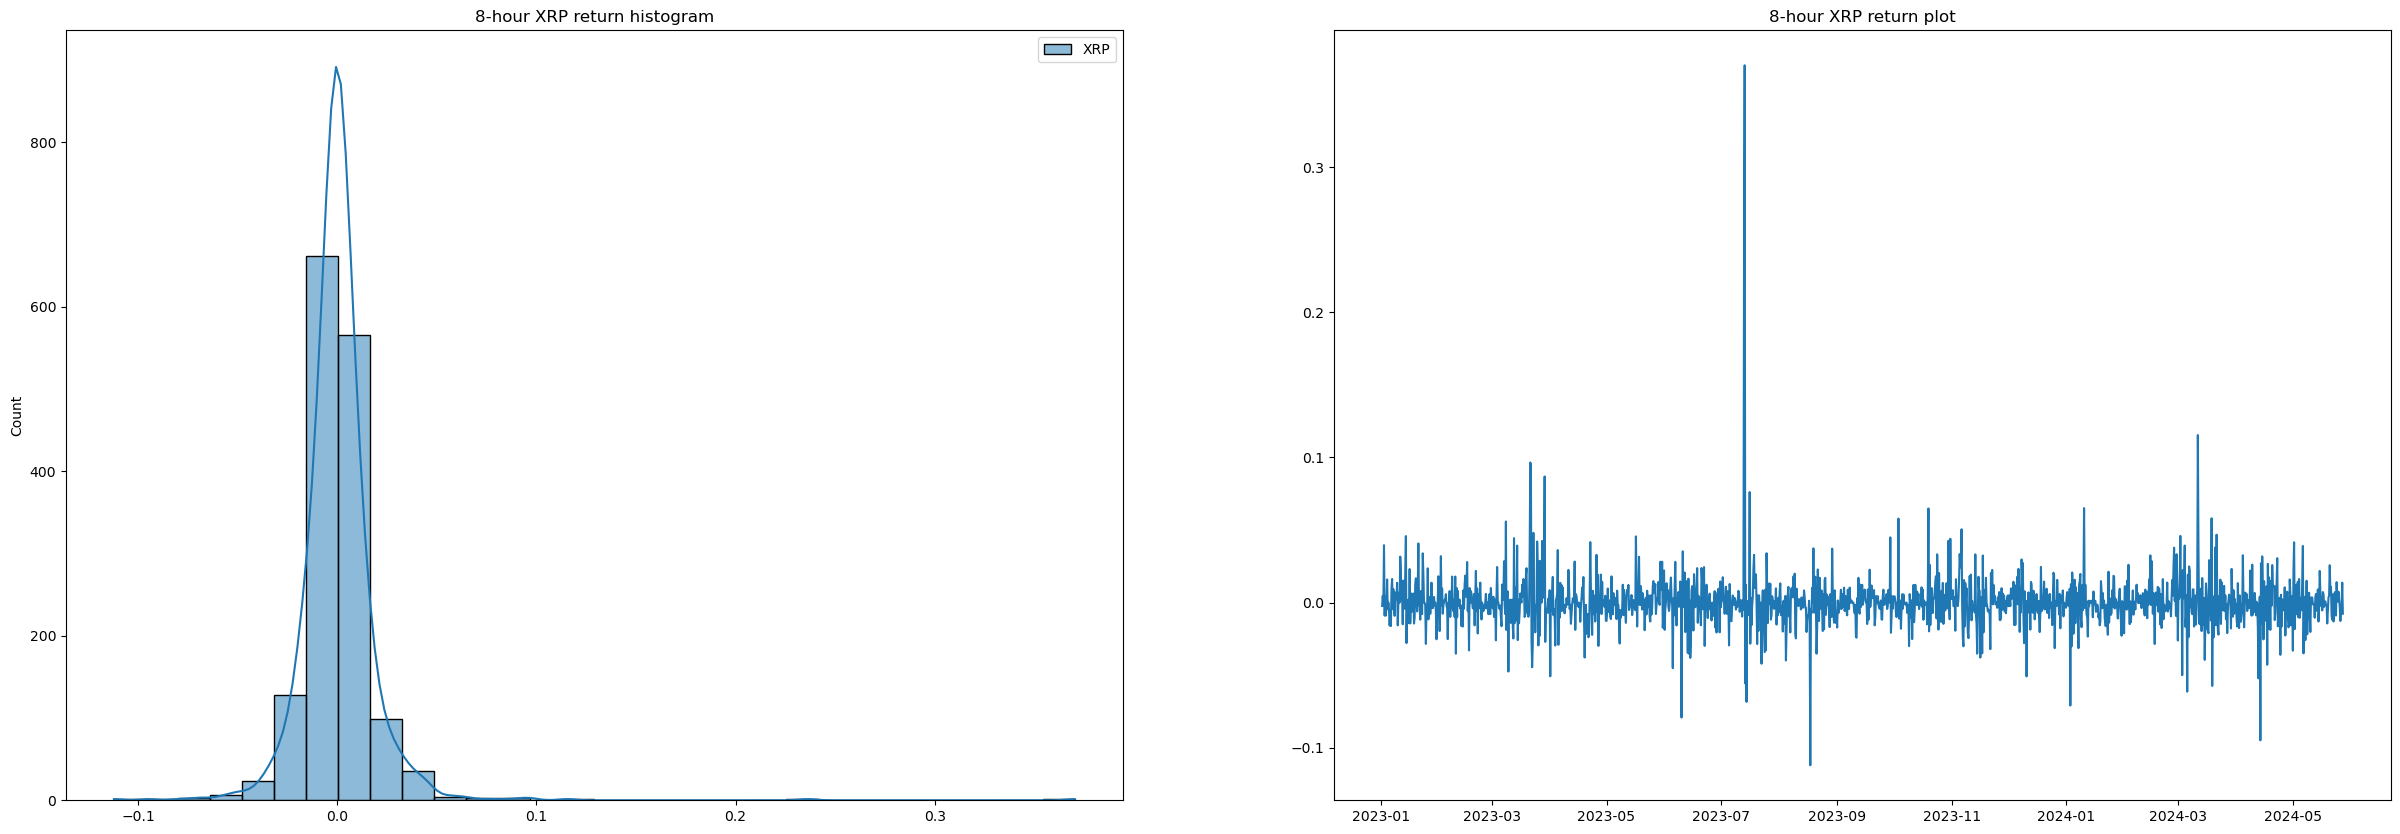

In [22]:
plt.figure(figsize=(30, 10));

plt.subplot(1,2,1);
sns.histplot(xrp_8h_price.pct_change(),kde=True, bins=30);
plt.title('8-hour XRP return histogram');
plt.subplot(1,2,2);
plt.plot(xrp_8h_price.pct_change());
plt.title('8-hour XRP return plot');

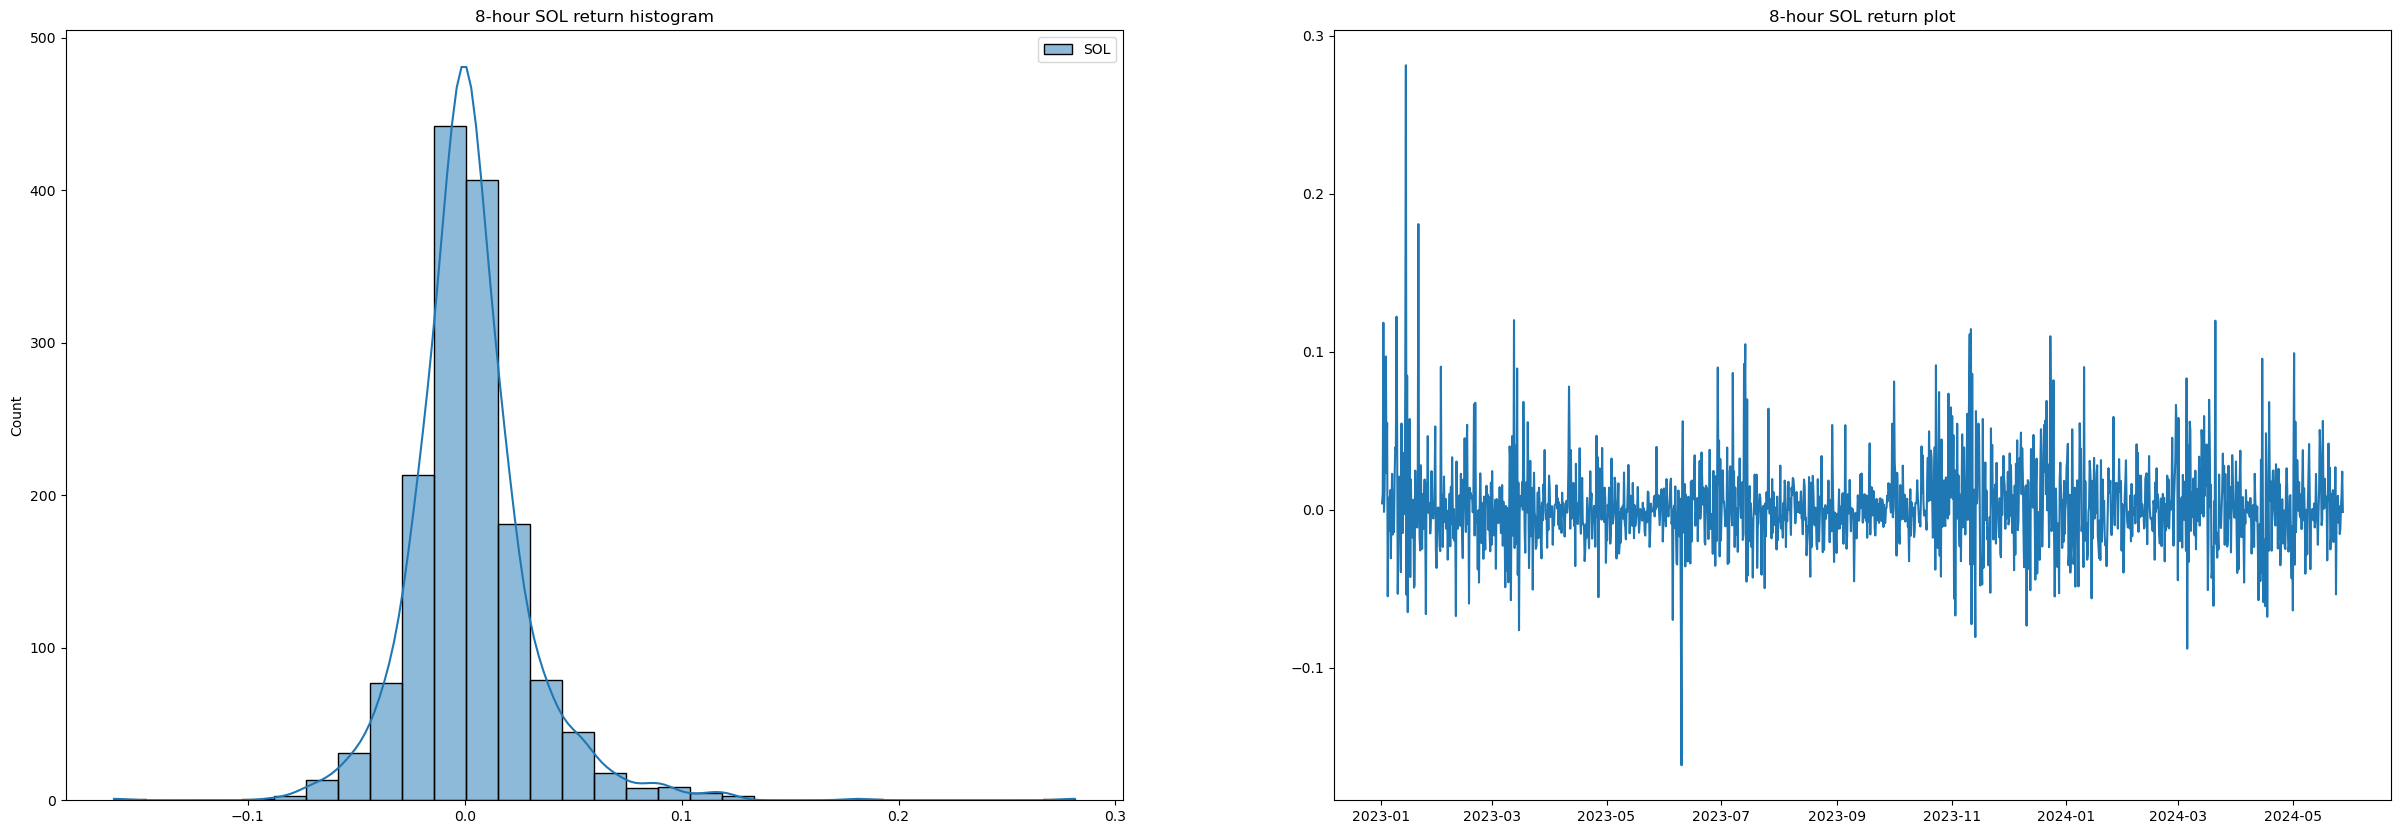

In [23]:
plt.figure(figsize=(30, 10));

plt.subplot(1,2,1);
sns.histplot(sol_8h_price.pct_change(),kde=True, bins=30);
plt.title('8-hour SOL return histogram');
plt.subplot(1,2,2);
plt.plot(sol_8h_price.pct_change());
plt.title('8-hour SOL return plot');

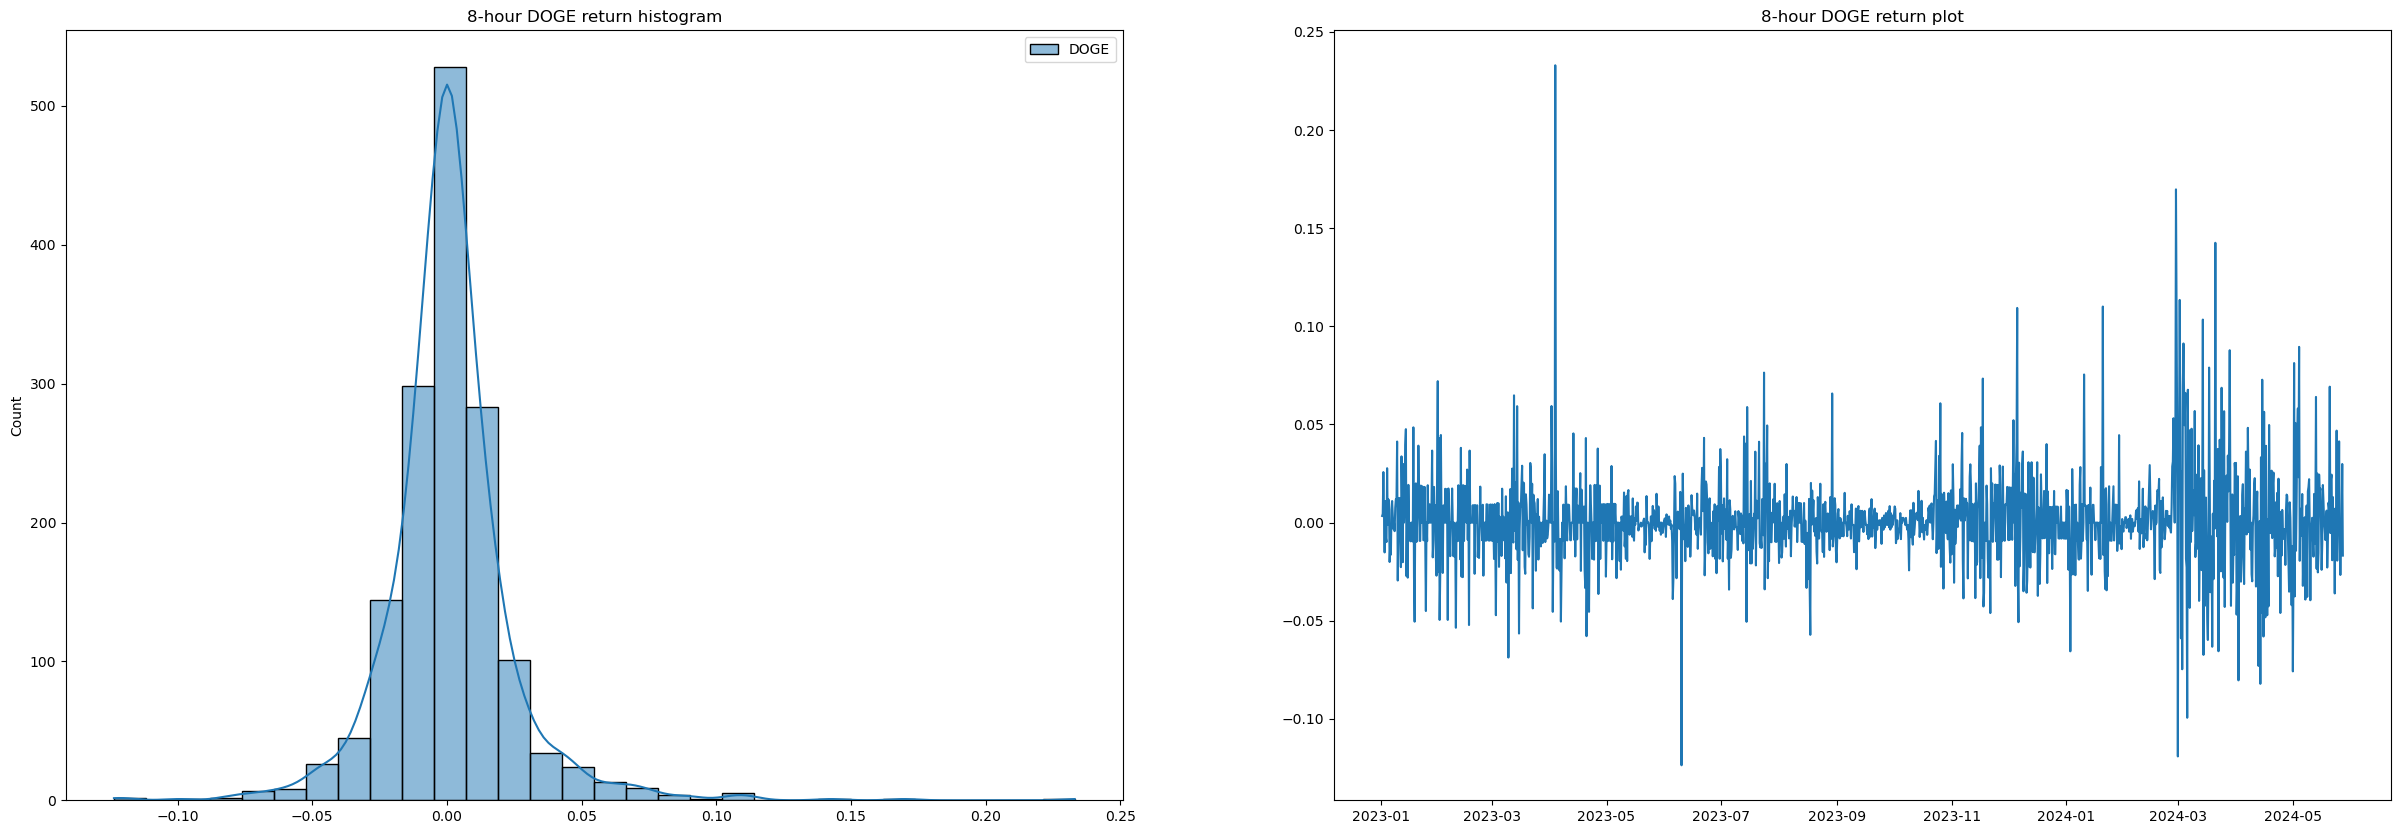

In [24]:
plt.figure(figsize=(30, 10));

plt.subplot(1,2,1);
sns.histplot(doge_8h_price.pct_change(),kde=True, bins=30);
plt.title('8-hour DOGE return histogram');
plt.subplot(1,2,2);
plt.plot(doge_8h_price.pct_change());
plt.title('8-hour DOGE return plot');

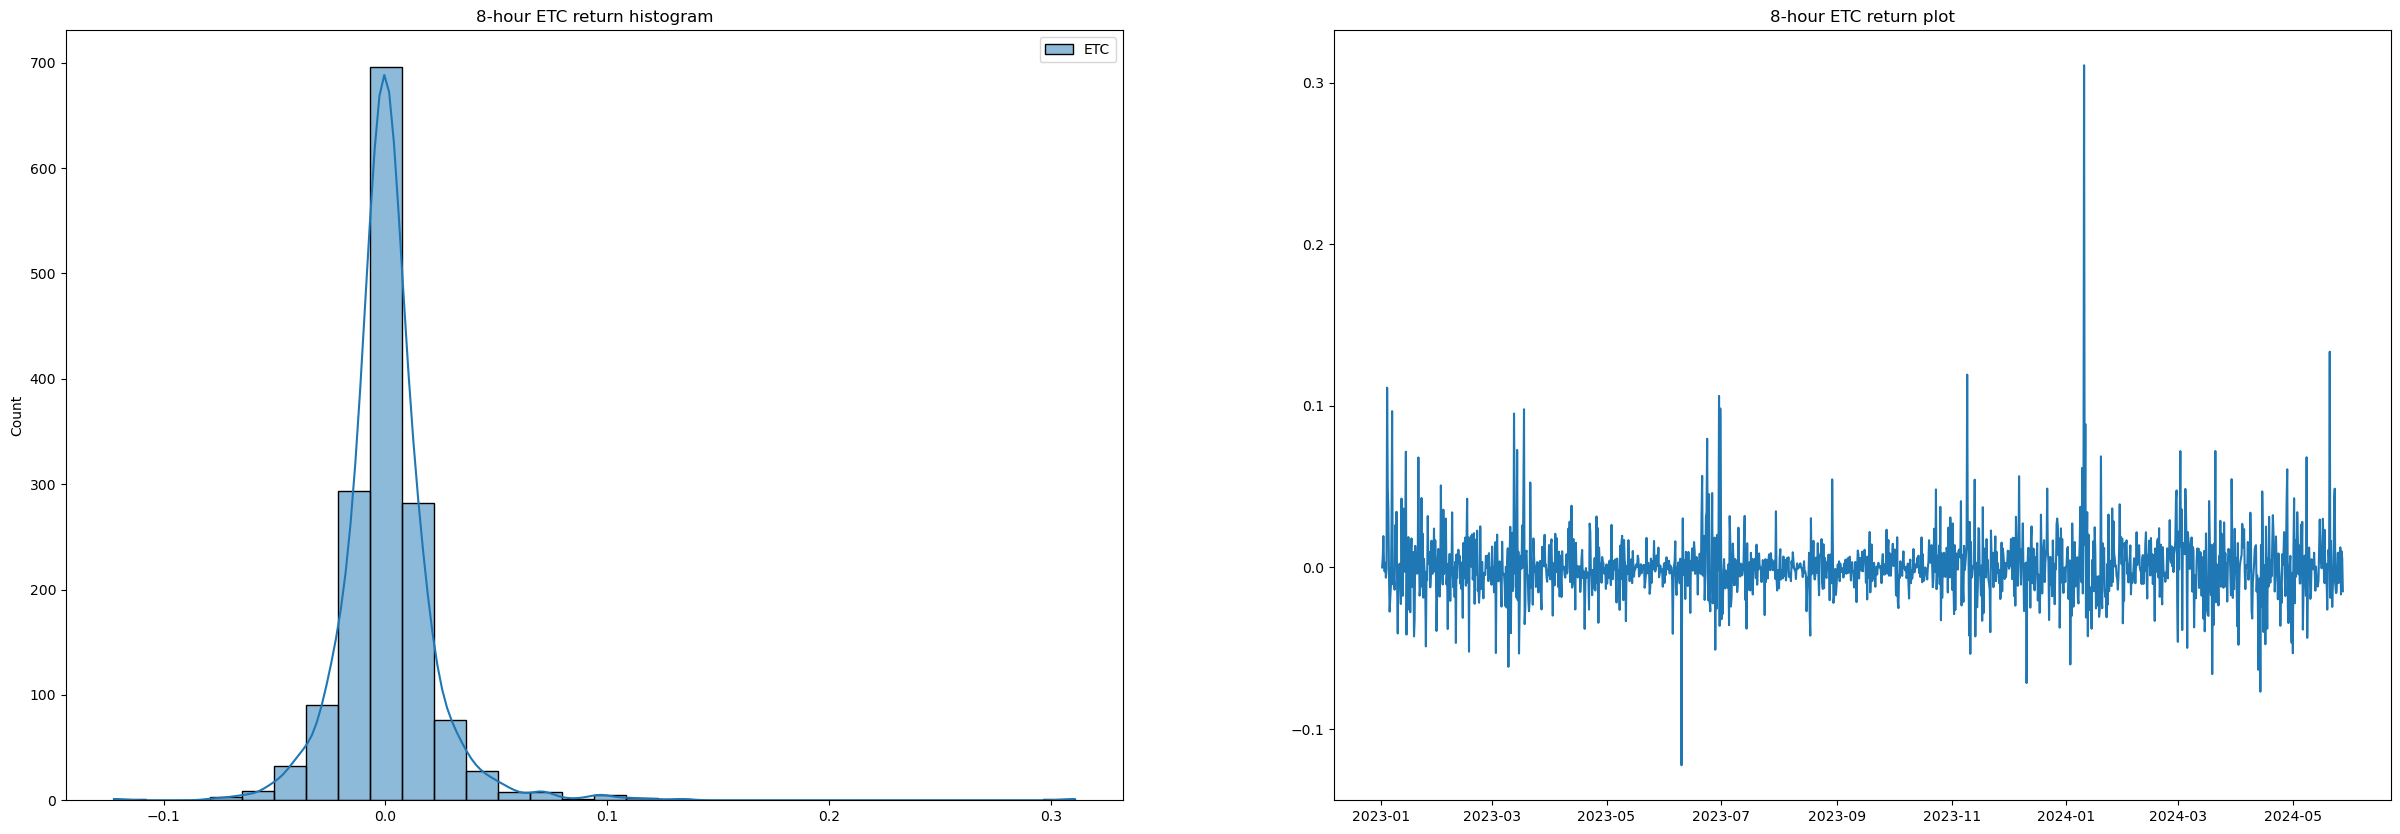

In [25]:
plt.figure(figsize=(30, 10));

plt.subplot(1,2,1);
sns.histplot(etc_8h_price.pct_change(),kde=True, bins=30);
plt.title('8-hour ETC return histogram');
plt.subplot(1,2,2);
plt.plot(etc_8h_price.pct_change());
plt.title('8-hour ETC return plot');

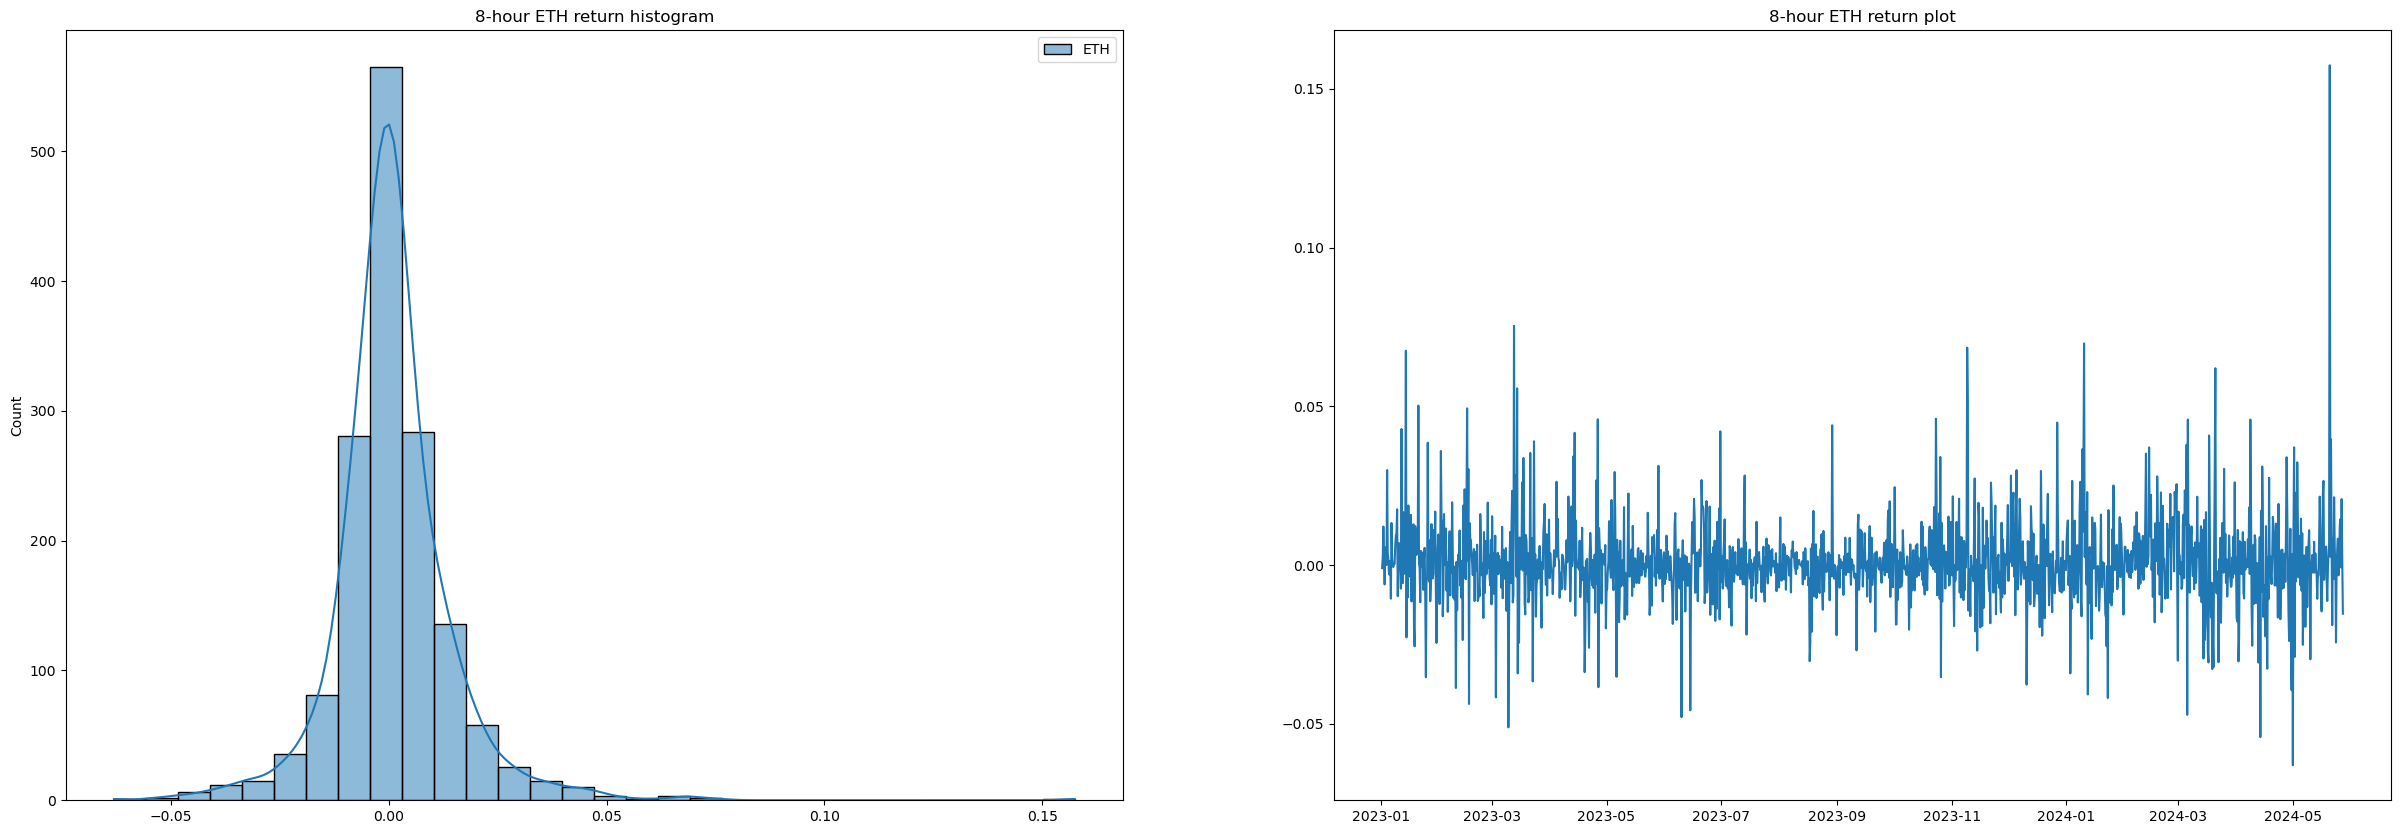

In [26]:
plt.figure(figsize=(30, 10));

plt.subplot(1,2,1);
sns.histplot(eth_8h_price.pct_change(),kde=True, bins=30);
plt.title('8-hour ETH return histogram');
plt.subplot(1,2,2);
plt.plot(eth_8h_price.pct_change());
plt.title('8-hour ETH return plot');

In [11]:
all_time_list =[
    all_15m_list,
    all_1h_list,
    all_4h_list,
    all_6h_list,
    all_8h_list,
    all_12h_list,
    all_1d_list,
    all_1w_list
]

In [30]:
# Calculate the rolling volatility over a 30-minute window
btc_8h_price['rolling_volatility'] = btc_8h_price['BTC'].rolling(window=21).std()

# Plot the rolling volatility
plt.figure(figsize=(12, 6));
plt.plot(btc_8h_price.index, btc_8h_price['rolling_volatility'], color='blue');
plt.title('Rolling Volatility of Bitcoin 8H Price (1-Week window)');
plt.xlabel('Time (UTC)');
plt.ylabel('Rolling Volatility (KRW)');
plt.grid(True);

58

In [39]:
price_8h_df = price_df.resample('8H').agg({code:'last' for code in price_df.columns})
price_8h_corr_df = price_8h_df.corr()

corr_df = price_8h_corr_df.reset_index().melt(id_vars='index', value_vars=price_8h_corr_df.columns)
corr_df.columns =['coin1', 'coin2', 'corr']
corr_df = corr_df[corr_df['corr']!=1].sort_values(by='corr', ascending=False).drop_duplicates(subset='corr')

In [40]:
corr_df

,coin1,coin2,corr
28,ETH,BTC,0.98292
5965,MANA,SAND,0.97779
6188,BTC,SOL,0.97472
1122,FLOW,AXS,0.96978
7197,AQT,TON,0.96934
...,...,...,...
4143,LOOM,KAVA,-0.35186
2320,KAVA,ELF,-0.35745
7325,KAVA,TRX,-0.43266
7962,KAVA,XLM,-0.45224


In [70]:
log_price_8h_df = np.log(price_8h_df)

In [113]:
correlation_df = pd.DataFrame()
cnt = 1
for rolling_df in log_price_8h_df.rolling(window=252, step=21):
    if rolling_df.shape[0] < 252: continue
    corr_df = rolling_df.corr()
    corr_df = corr_df.reset_index().melt(id_vars='index', value_vars=corr_df.columns)
    corr_df.columns =['coin1', 'coin2', 'corr']
    corr_df = corr_df[corr_df['corr']!=1].sort_values(by='corr', ascending=False).drop_duplicates(subset='corr')

    # Top 10 Correlation 구하는 코드
    # top10_corr = corr_df.nlargest(10, 'corr').reset_index(drop=True)['corr']
    # top10_corr.name = f'#{cnt}'
    # cnt += 1
    # correlation_df = pd.concat([correlation_df, top10_corr], axis=1)

    corr_df = corr_df.reset_index(drop=True)
    for pair in corr_df.nlargest(10, 'corr').values:
        coin1, coin2, _ = pair
        coin1_df = rolling_df[coin1]
        coin2_df = rolling_df[coin2]
        coin1_log_price = coin1_df.values
        coin2_log_price = coin2_df.values

        # 선형 회귀 모델 적합
        X = coin1_log_price
        Y = coin2_log_price
        X = sm.add_constant(X)

        model = sm.OLS(Y,X).fit()
        beta = model.params[1]
        beta
        # 반감기 계산
        half_life = -np.log(2) / beta
        print(half_life)
        
        break
    break
    

    

0.9859511386131355

-0.7030238653965591


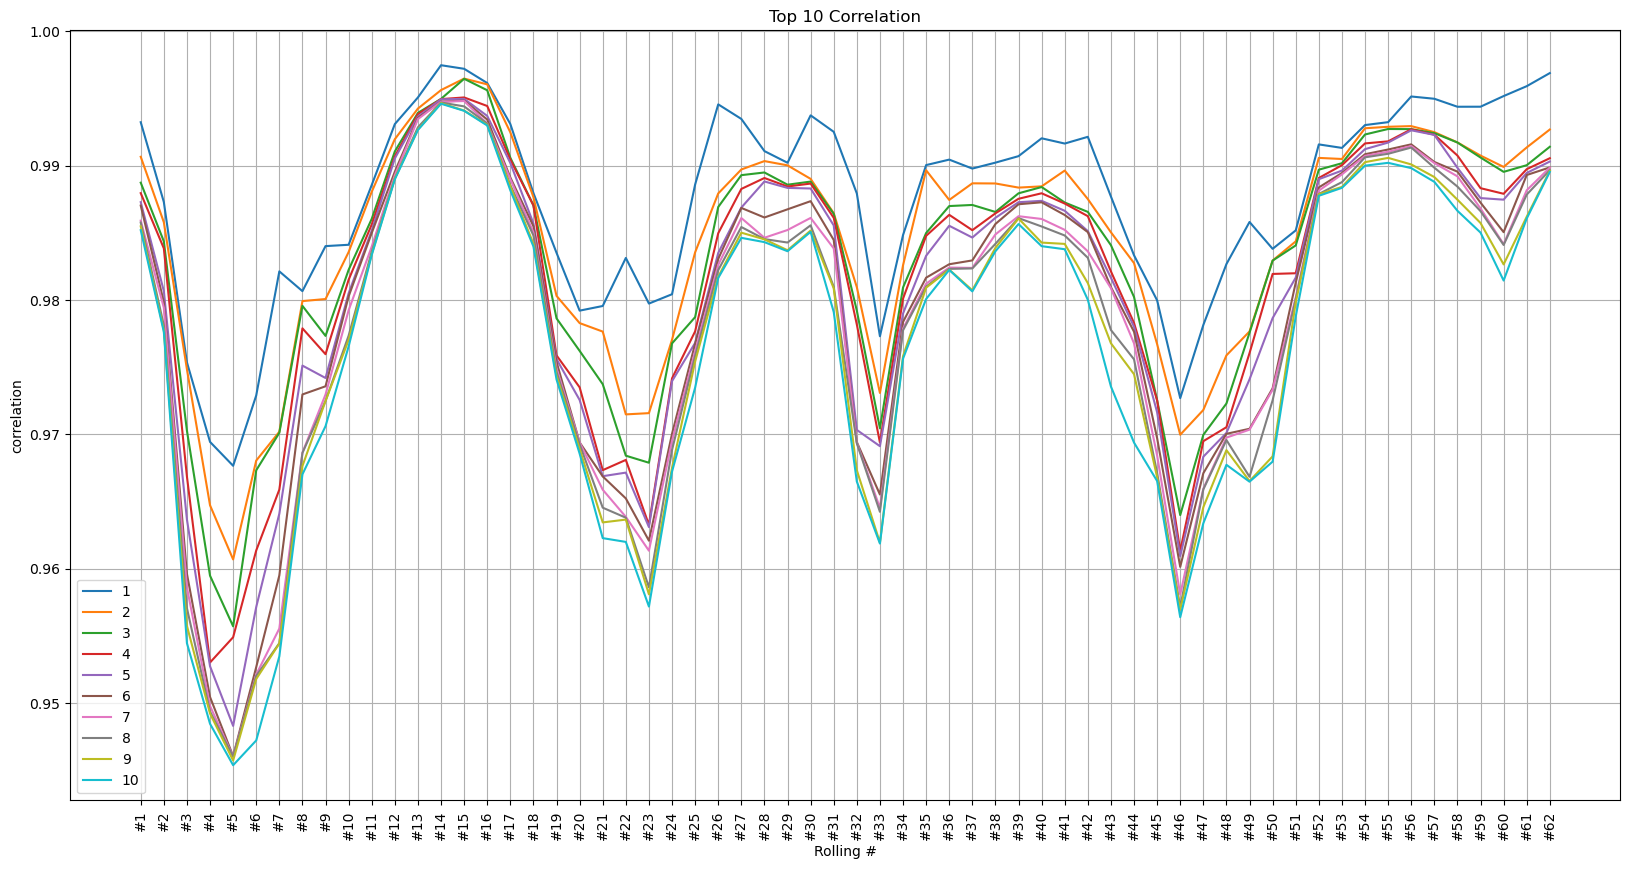

In [99]:
plt.figure(figsize=(20,10))
plt.title('Top 10 Correlation')
for i in range(10):
    plt.plot(correlation_df.iloc[i], label=f'{i+1}');
    plt.xticks(rotation=90)
plt.grid(True);
plt.ylabel('correlation');
plt.xlabel('Rolling #');
plt.legend();
